In [4]:
from keras.models import load_model
import pandas as pd
import numpy as np

In [43]:
model = load_model('model4_single')


In [44]:
df = pd.read_csv('./processed_data.csv')
print(len(df))

5417


In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,timestamp,shifted_adj_close,Adj Close Returns,SMA_50,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9,Day Delta
0,2000-12-08,666.666687,715.000000,633.333313,680.000000,562.626587,6696000,976255200,562.626587,1.000000,NaN,NaN,NaN,NaN,3.0
1,2000-12-11,675.000000,680.000000,580.000000,580.000000,479.887451,1272000,976514400,562.626587,1.172414,NaN,NaN,NaN,NaN,1.0
2,2000-12-12,575.000000,621.666687,571.666687,591.666687,489.540344,1068000,976600800,479.887451,0.980282,NaN,NaN,NaN,NaN,1.0
3,2000-12-13,586.666687,608.333313,541.666687,566.666687,468.855591,552000,976687200,489.540344,1.044118,NaN,NaN,NaN,NaN,1.0
4,2000-12-14,561.666687,563.333313,541.666687,558.333313,461.960663,330000,976773600,468.855591,1.014925,NaN,NaN,NaN,NaN,1.0


In [46]:
model.summary()

Model: "sequential_278"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_167 (Conv1D)         (None, 98, 64)            640       
                                                                 
 bidirectional_142 (Bidirect  (None, 98, 64)           24832     
 ional)                                                          
                                                                 
 conv1d_168 (Conv1D)         (None, 96, 32)            6176      
                                                                 
 flatten_48 (Flatten)        (None, 3072)              0         
                                                                 
 dense_217 (Dense)           (None, 1)                 3073      
                                                                 
Total params: 34,721
Trainable params: 34,721
Non-trainable params: 0
________________________________________________

In [57]:
look_back = 100
def create_dataset(returns, volume):
    dataX, dataY = [], []
    for i in range(0, len(returns)-look_back-1):
        a = np.vstack([
            returns[i:i+look_back],
            volume[i:i+look_back]/50000,
            returns[i:i+look_back]*0+1,
#             MovingAvg[i:i+look_back]/MovingAvg[i]
#             np.where(MACDh[i:i+look_back] > MACDs[i:i+look_back],1,-1),
#             dayDelta[i:i+look_back],
#             scaler*Open[i:i+look_back],
#             scaler*Low[i:i+look_back],
#             scaler*High[i:i+look_back],
#             scaler*AdjClose[i:i+look_back],
        ]).T
        dataX.append(a)
        dataY.append(returns[i + look_back])
    return np.array(dataX), np.array(dataY)

In [58]:
multiX, dataY = create_dataset(df["Adj Close Returns"].to_numpy(), df["Volume"].to_numpy())


In [59]:
model.predict(multiX)

167/167 [==============================] - 1s 7ms/step


array([[1.0166743 ],
       [0.99881047],
       [1.0147548 ],
       ...,
       [0.983155  ],
       [0.9771622 ],
       [0.9725248 ]], dtype=float32)

In [60]:
dataY

array([0.97709927, 1.        , 1.        , ..., 0.96092504, 1.0032    ,
       1.01461039])

In [61]:
res = pd.DataFrame(data=dataY, columns=["target"])
res["predict"] = model.predict(multiX)

167/167 [==============================] - 1s 7ms/step


<AxesSubplot:>

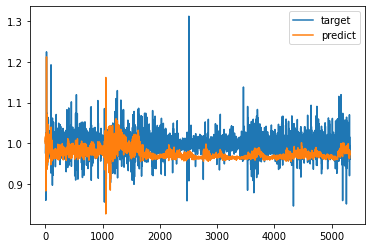

In [62]:
res.plot()

In [63]:
def sign_score(listA, listB):
    if len(listA) != len(listB):
        raise "Lists must be the same length"
    return np.sum(np.where(listA*listB>0,1,0))/len(listA)


In [64]:
sign_score(res["target"].to_numpy()-1, res["predict"].to_numpy()-1)

0.481941309255079